In [ ]:
import os
import cv2 as cv
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd
from keras import layers
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
import keras.utils as image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization
import glob
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
training_path = '/content/drive/MyDrive/Group_Project_Data/Train'
test_path = '/content/drive/MyDrive/Group_Project_Data/Valid'
print(training_path)

/content/drive/MyDrive/Group_Project_Data/Train


In [ ]:
# Function to display a picture of a cat/dog and it's respective label
def plot_image(path, int_type):
    _path = path
    label = None
    if int_type == 0:
        _path = _path + "/" + "Fake"
        label = 0
    else:
        _path = _path + "/" + "Real"
        label = 1
    
    plt.figure(figsize=(30, 30))
    plt.subplots_adjust(top=None, bottom=None, left=None, right=None, wspace=0.2, hspace=0.5)
    
    lst_img_name = os.listdir(_path)
    for i in range(1, 17, 1):
        th = np.random.randint(0, len(lst_img_name) - 1)
        plt.subplot(4, 4, i)
        img = _path + "/" + lst_img_name[th]
        img = cv.imread(img)
        plt.imshow(img)
        if label == 0:
            plt.title("Fake")
        else:
            plt.title("Real")

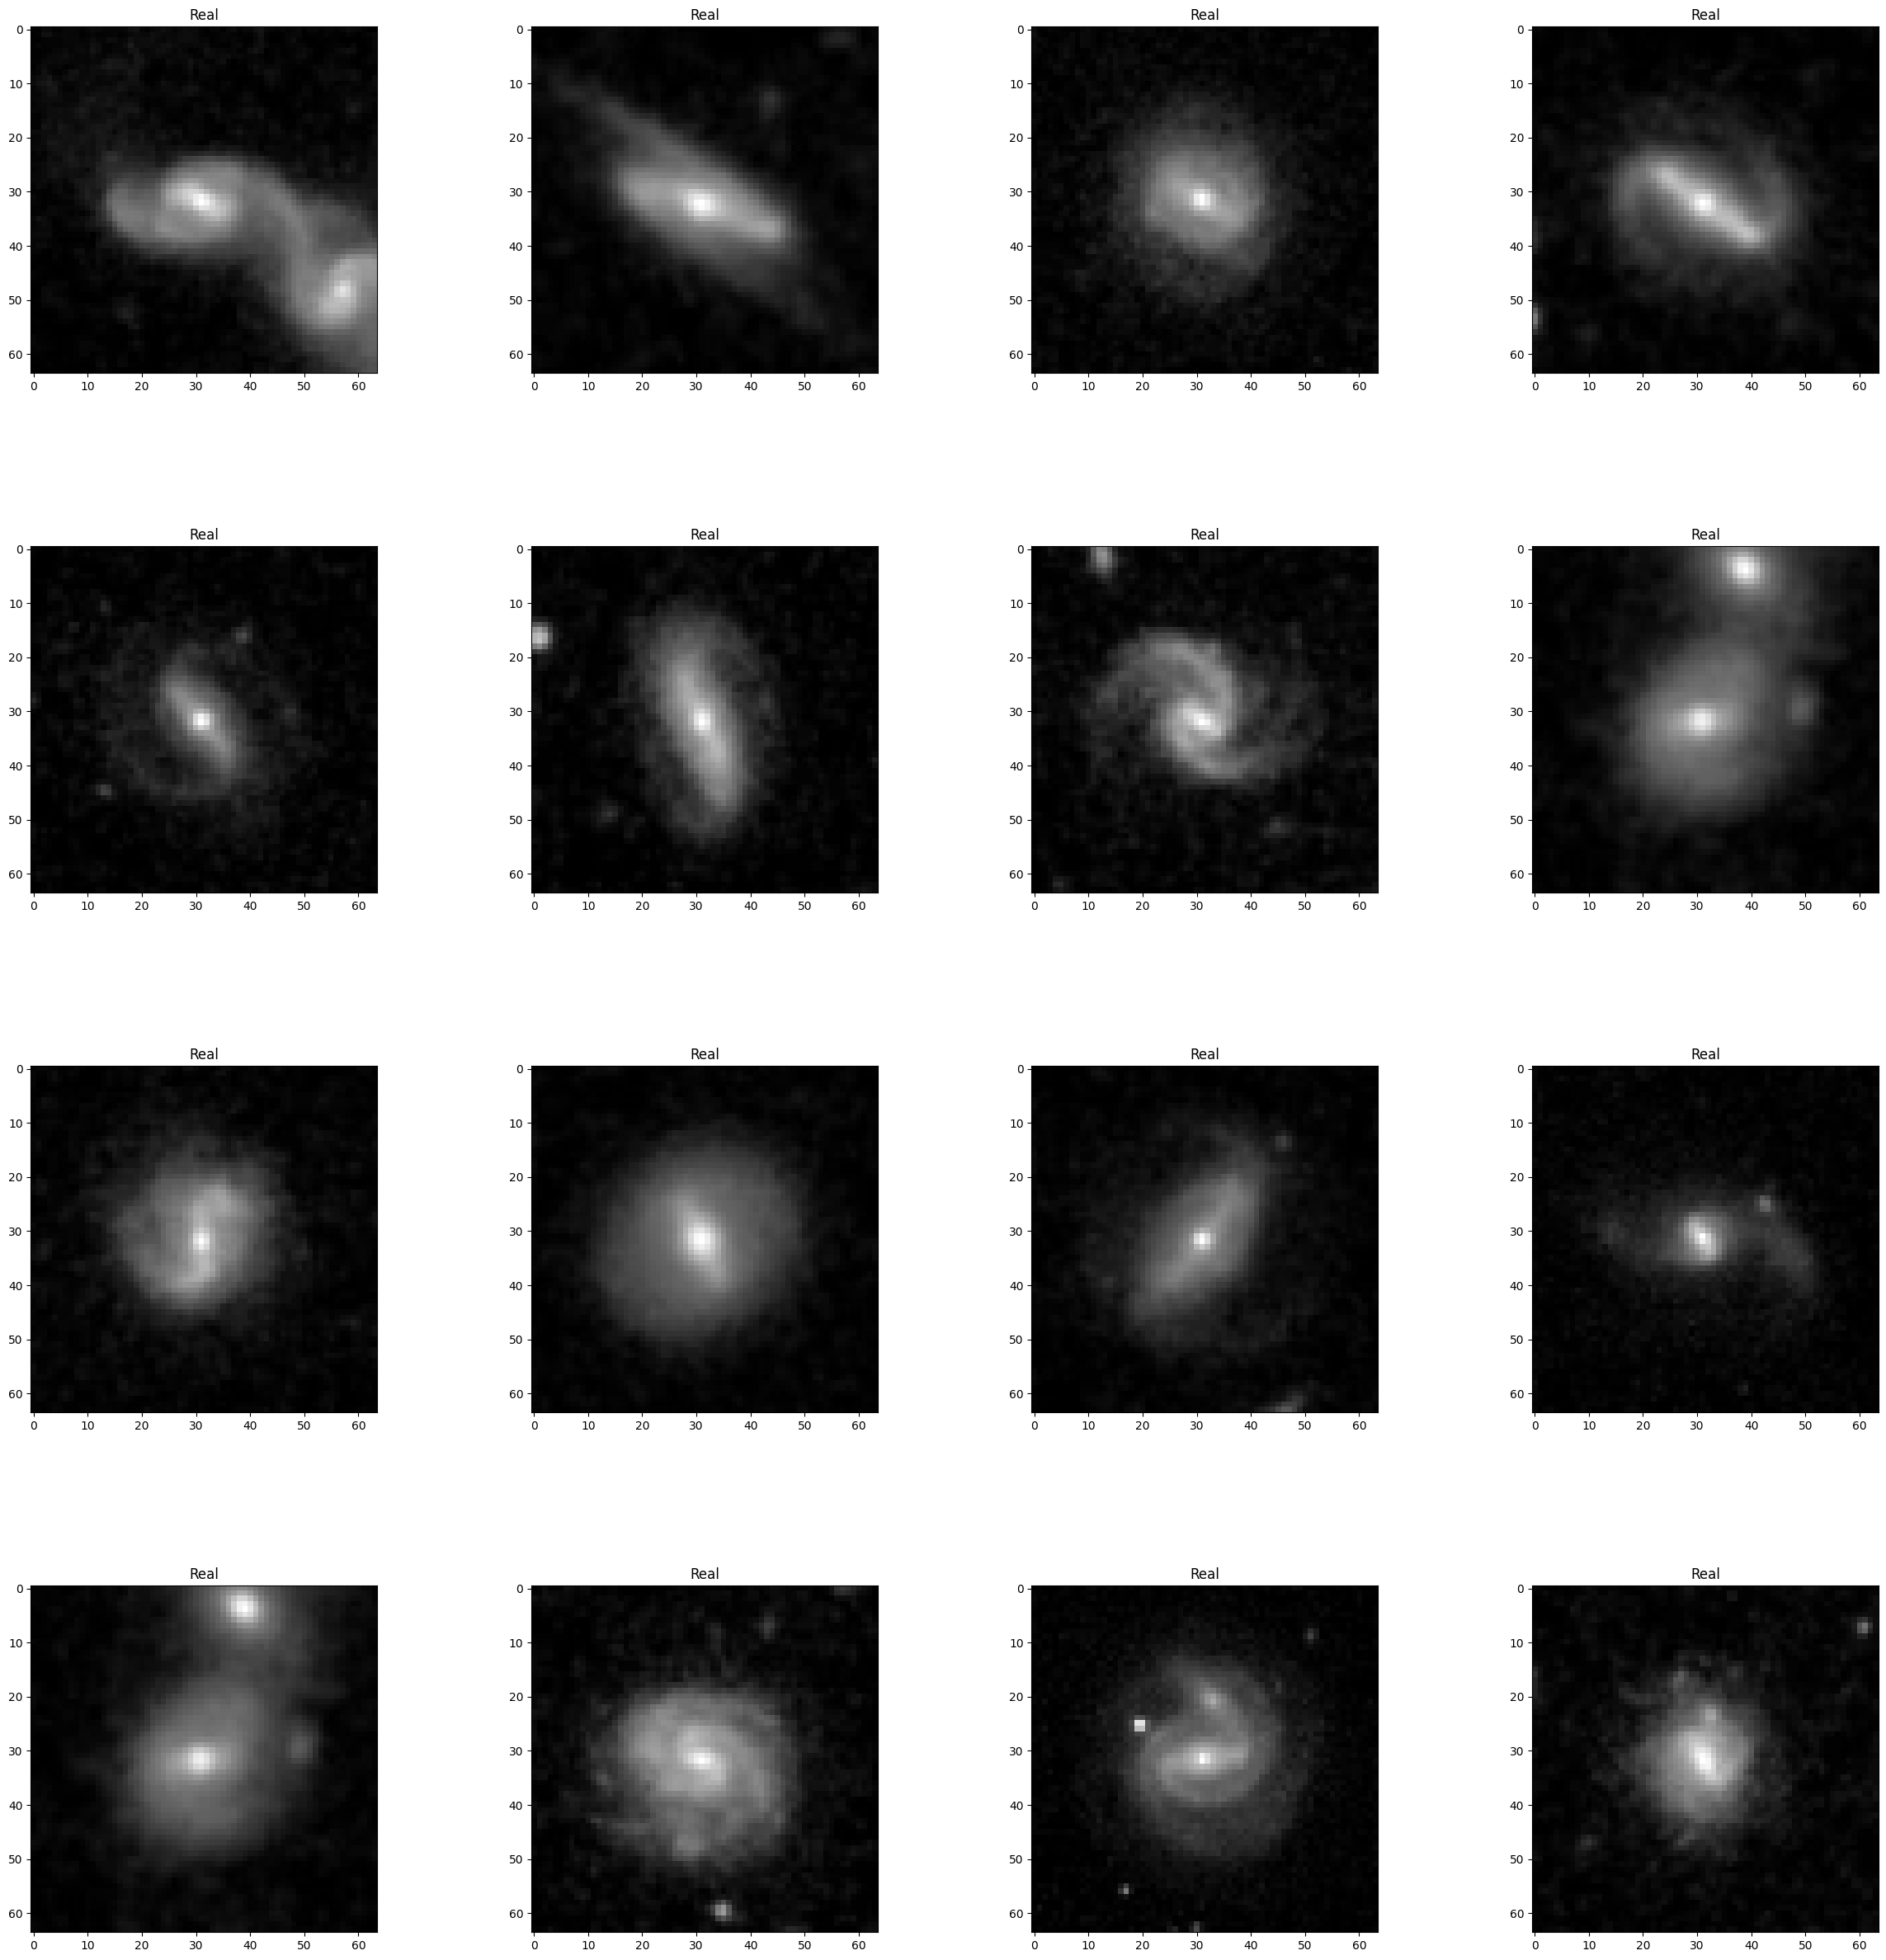

In [ ]:
plot_image(training_path, 1)

In [ ]:
train_data=ImageDataGenerator(rescale=1./255,horizontal_flip=True, vertical_flip=True)
test_data=ImageDataGenerator(rescale=1./255,horizontal_flip=True, vertical_flip=True)

In [ ]:
train_data_generated=train_data.flow_from_directory(
            directory=training_path, 
            batch_size=60, 
            target_size=(64,64), 
            
            class_mode='binary')

test_data_generated=test_data.flow_from_directory(
            directory=test_path, 
            batch_size=60, 
            target_size=(64,64), 
            
            class_mode='binary')


Found 6000 images belonging to 2 classes.
Found 1803 images belonging to 2 classes.


In [ ]:
from keras import regularizers
from keras.layers import LeakyReLU
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), input_shape=(64,64,3)))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(32, (3, 3)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(32))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 62, 62, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 60, 60, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        9248      
                                                      

In [ ]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
model_info = model.fit(train_data_generated, epochs=10, validation_data=test_data_generated,callbacks=[es],steps_per_epoch=len(train_data_generated))

Epoch 1/10
100/100 [==============================] - 1058s 10s/step - loss: 0.6885 - accuracy: 0.5480 - val_loss: 0.6634 - val_accuracy: 0.5879
Epoch 2/10
100/100 [==============================] - 13s 131ms/step - loss: 0.5223 - accuracy: 0.8058 - val_loss: 0.2411 - val_accuracy: 0.9595
Epoch 3/10
100/100 [==============================] - 13s 130ms/step - loss: 0.1795 - accuracy: 0.9593 - val_loss: 0.0861 - val_accuracy: 0.9784
Epoch 4/10
100/100 [==============================] - 13s 131ms/step - loss: 0.0908 - accuracy: 0.9795 - val_loss: 0.0495 - val_accuracy: 0.9878
Epoch 5/10
100/100 [==============================] - 13s 130ms/step - loss: 0.0591 - accuracy: 0.9870 - val_loss: 0.0370 - val_accuracy: 0.9884
Epoch 6/10
100/100 [==============================] - 13s 131ms/step - loss: 0.0395 - accuracy: 0.9908 - val_loss: 0.0354 - val_accuracy: 0.9889
Epoch 7/10
100/100 [==============================] - 13s 129ms/step - loss: 0.0431 - accuracy: 0.9883 - val_loss: 0.0284 - val_ac

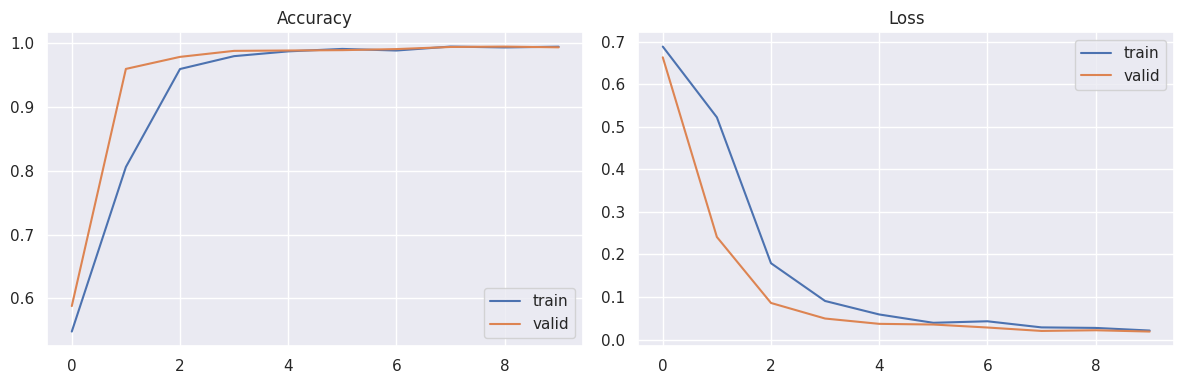

In [ ]:
from matplotlib import pyplot

sns.set()
fig = pyplot.figure(0, (12, 4))

ax = pyplot.subplot(1, 2, 1)
sns.lineplot(model_info.history['accuracy'], label='train')
sns.lineplot( model_info.history['val_accuracy'], label='valid')
pyplot.title('Accuracy')
pyplot.tight_layout()

ax = pyplot.subplot(1, 2, 2)
sns.lineplot( model_info.history['loss'], label='train')
sns.lineplot( model_info.history['val_loss'], label='valid')
pyplot.title('Loss')
pyplot.tight_layout()

#pyplot.savefig('epoch_history_CNN.png')
pyplot.show()

In [ ]:
pred=model.predict(test_data_generated)


31/31 [==============================] - 3s 100ms/step


In [ ]:
print(pred)

[[0.00168736]
 [0.99996316]
 [1.        ]
 ...
 [0.00203826]
 [0.9999943 ]
 [0.0014846 ]]


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf

def test_model(path, model, int_type):
    pred=[]
    _path = path
    label = None
    predict_label = None
    if int_type == 0:
        _path = _path + "/" + "Fake"
        label = 0
    else:
        _path = _path + "/" + "Real"
        label = 1
    
    plt.figure(figsize=(30, 30))
    plt.subplots_adjust(top=None, bottom=None, left=None, right=None, wspace=0.2, hspace=0.5)
    lst_img_name = os.listdir(_path)
    if len(lst_img_name) < 2:
        return
    for i in range(1, 17, 1):
        th = np.random.randint(0, len(lst_img_name) - 1)
        plt.subplot(4, 4, i)
        img = _path + "/" + lst_img_name[th]
        image_test = tf.keras.preprocessing.image.load_img(img, target_size=(64,64))
        image_test = tf.keras.preprocessing.image.img_to_array(image_test)
        image_test = np.expand_dims(image_test, axis = 0)
        predict = model.predict(image_test)
        #pred.append(predict)
        
        img = cv.imread(img)
        plt.imshow(img)
        print(predict[0][0])
        if predict[0][0] > 0.5:
            predict_label = "Predic: Real"
            pred.append("real")
        else:
            predict_label = "Predic: Fake"
            pred.append("fake")
            
        if label == 0:
            plt.title("Actual: Fake" + " - " + predict_label)
        else:
            plt.title("Acutal: Real" + " - " + predict_label)


1/1 [==============================] - 0s 30ms/step
1.0
1/1 [==============================] - 0s 35ms/step
1.0
1/1 [==============================] - 0s 31ms/step
1.0
1/1 [==============================] - 0s 29ms/step
1.0
1/1 [==============================] - 0s 26ms/step
1.0
1/1 [==============================] - 0s 21ms/step
1.0
1/1 [==============================] - 0s 20ms/step
1.0
1/1 [==============================] - 0s 20ms/step
1.0
1/1 [==============================] - 0s 19ms/step
1.0
1/1 [==============================] - 0s 19ms/step
1.0
1/1 [==============================] - 0s 52ms/step
1.0
1/1 [==============================] - 0s 18ms/step
1.0
1/1 [==============================] - 0s 18ms/step
1.0
1/1 [==============================] - 0s 21ms/step
4.3249387e-29
1/1 [==============================] - 0s 20ms/step
1.0
1/1 [==============================] - 0s 17ms/step
1.0


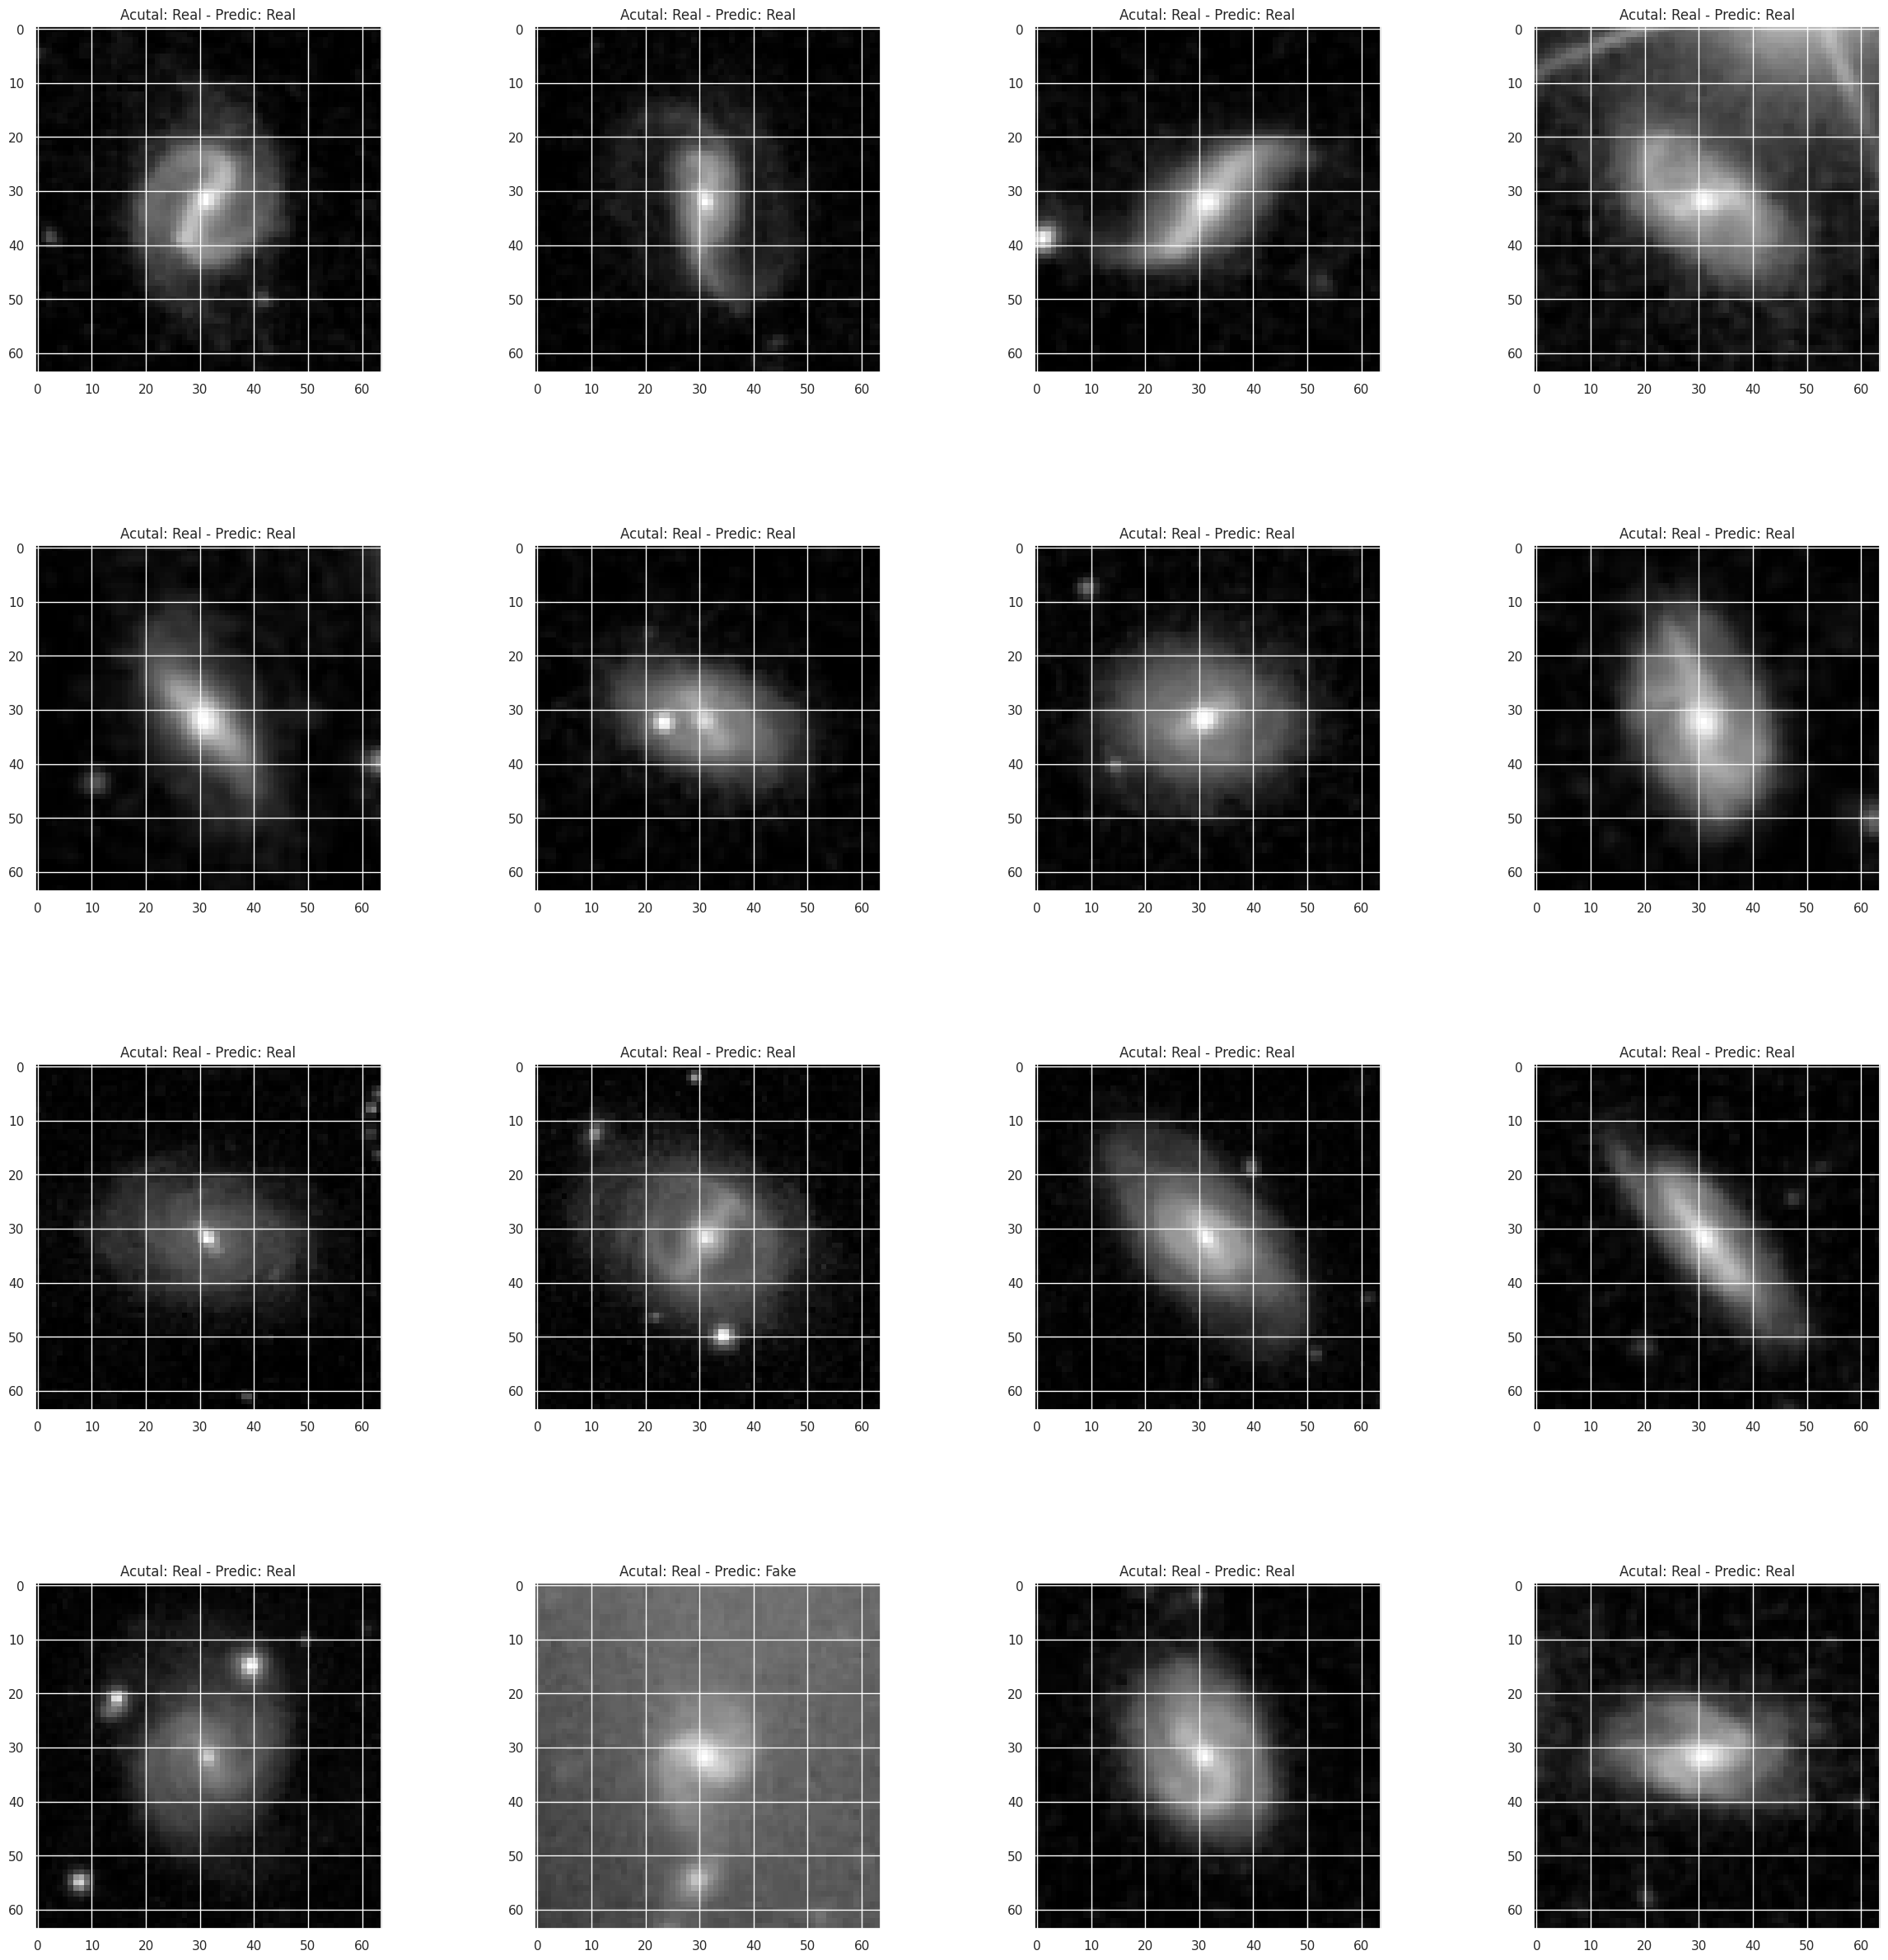

In [ ]:
test_model(test_path, model, 1)